<a href="https://colab.research.google.com/github/OELSHARK/LogisticRegression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd


In [77]:
df = pd.read_csv('employee_data.csv')

In [78]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7048 non-null   object 
 1   gender            7048 non-null   object 
 2   SeniorCitizen     7048 non-null   int64  
 3   Partner           7048 non-null   object 
 4   Dependents        7046 non-null   object 
 5   tenure            7048 non-null   int64  
 6   PhoneService      7048 non-null   object 
 7   MultipleLines     7048 non-null   object 
 8   InternetService   7046 non-null   object 
 9   OnlineSecurity    7048 non-null   object 
 10  OnlineBackup      7048 non-null   object 
 11  DeviceProtection  7048 non-null   object 
 12  TechSupport       7048 non-null   object 
 13  StreamingTV       7048 non-null   object 
 14  StreamingMovies   7048 non-null   object 
 15  Contract          7048 non-null   object 
 16  PaperlessBilling  7048 non-null   object 


In [80]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7048.000000,7048.000000,7043.000000
mean,0.162032,32.359393,64.772547
std,0.368506,24.558583,30.087947
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.550000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [81]:
dtypes = df.dtypes
nunique = df.nunique()
null = df.isnull().sum()
dtypes_nunique_null = pd.DataFrame({"dtypes":dtypes,"nunique":nunique,"null":null})
dtypes_nunique_null

,dtypes,nunique,null
customerID,object,7043,0
gender,object,2,0
SeniorCitizen,int64,2,0
Partner,object,2,0
Dependents,object,2,2
tenure,int64,73,0
PhoneService,object,2,0
MultipleLines,object,3,0
InternetService,object,3,2
OnlineSecurity,object,3,0


In [82]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [83]:
numeric_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [84]:
df.drop('customerID',axis=1,inplace=True)

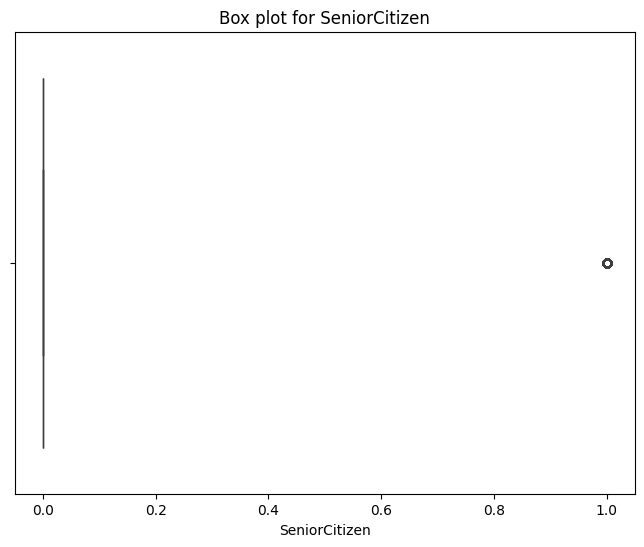

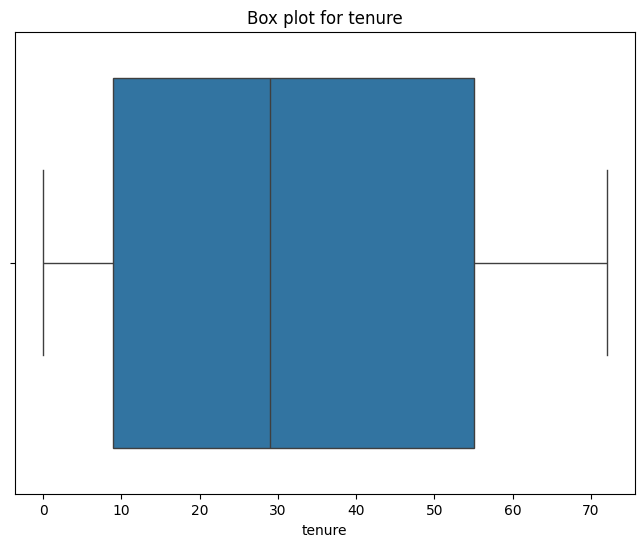

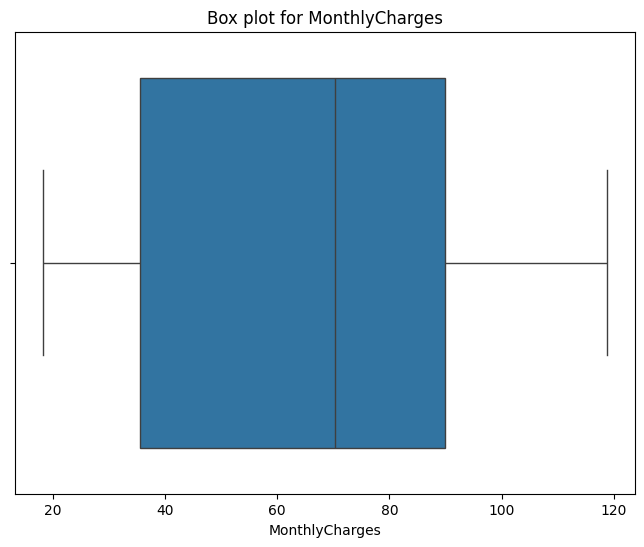

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in numeric_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column],orient='h')
  plt.xlabel(column)
  plt.title(f"Box plot for {column}")
  plt.show()

In [86]:
df['SeniorCitizen'].unique()

array([0, 1])

In [87]:
categorical_columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [88]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Column Name': df.columns,
                           'Missing Values': df.isnull().sum(),
                           'Missing Percentage': missing_percentage}).sort_values(by='Missing Percentage', ascending=False)
missing_df

,Column Name,Missing Values,Missing Percentage
MonthlyCharges,MonthlyCharges,5,0.070942
TotalCharges,TotalCharges,3,0.042565
Dependents,Dependents,2,0.028377
InternetService,InternetService,2,0.028377
gender,gender,0,0.000000
TechSupport,TechSupport,0,0.000000
PaymentMethod,PaymentMethod,0,0.000000
PaperlessBilling,PaperlessBilling,0,0.000000
Contract,Contract,0,0.000000
StreamingMovies,StreamingMovies,0,0.000000


In [89]:
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())

In [90]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7043,108.15
7044,1840.75
7045,151.65
7046,820.5


In [91]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mode()[0])


In [92]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])


In [93]:
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])


In [94]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Column Name': df.columns,
                           'Missing Values': df.isnull().sum(),
                           'Missing Percentage': missing_percentage}).sort_values(by='Missing Percentage', ascending=False)
missing_df

,Column Name,Missing Values,Missing Percentage
gender,gender,0,0.0
SeniorCitizen,SeniorCitizen,0,0.0
TotalCharges,TotalCharges,0,0.0
MonthlyCharges,MonthlyCharges,0,0.0
PaymentMethod,PaymentMethod,0,0.0
PaperlessBilling,PaperlessBilling,0,0.0
Contract,Contract,0,0.0
StreamingMovies,StreamingMovies,0,0.0
StreamingTV,StreamingTV,0,0.0
TechSupport,TechSupport,0,0.0


In [95]:
categorical_columns1 = df.select_dtypes(include=['object']).columns

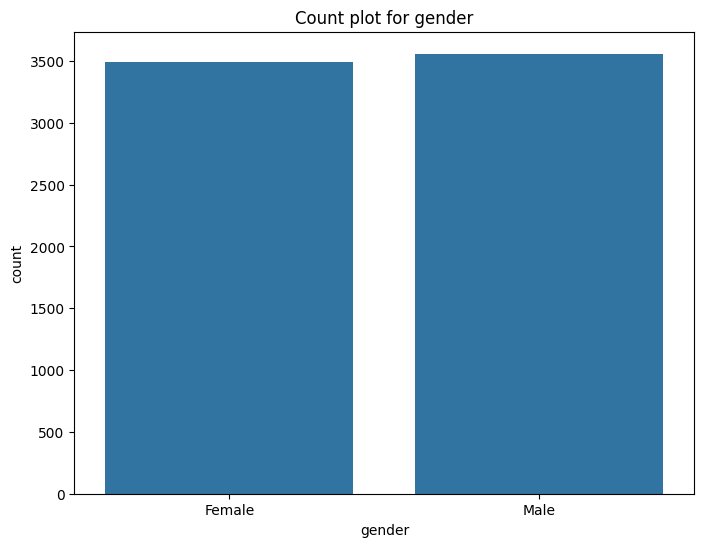

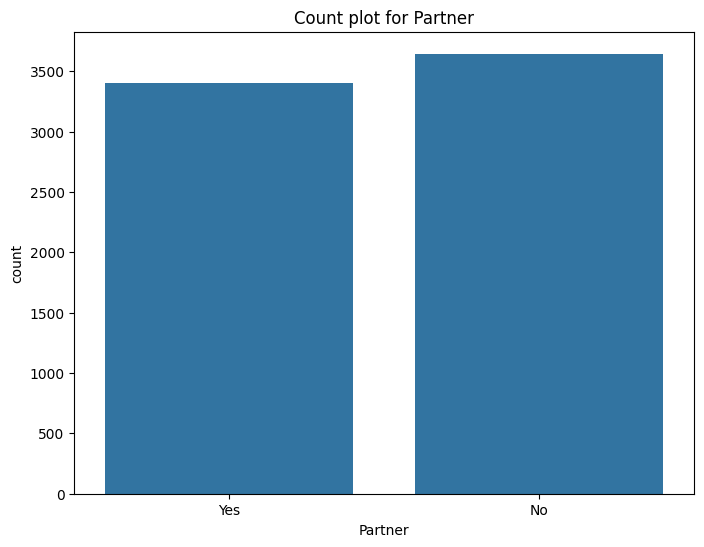

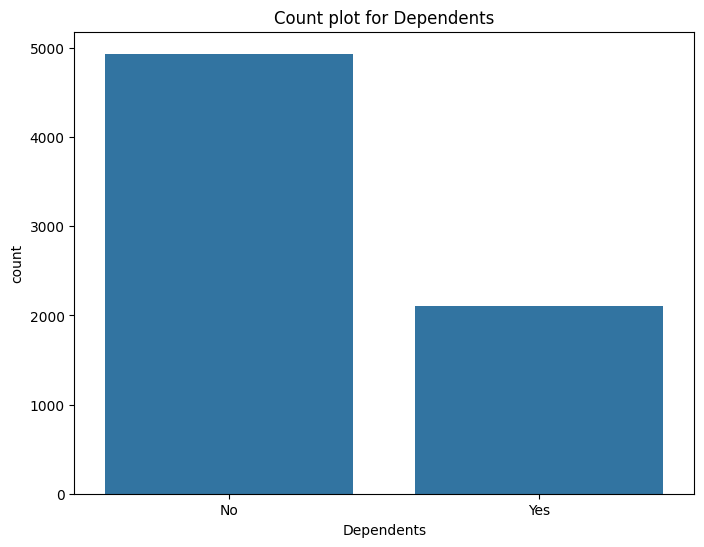

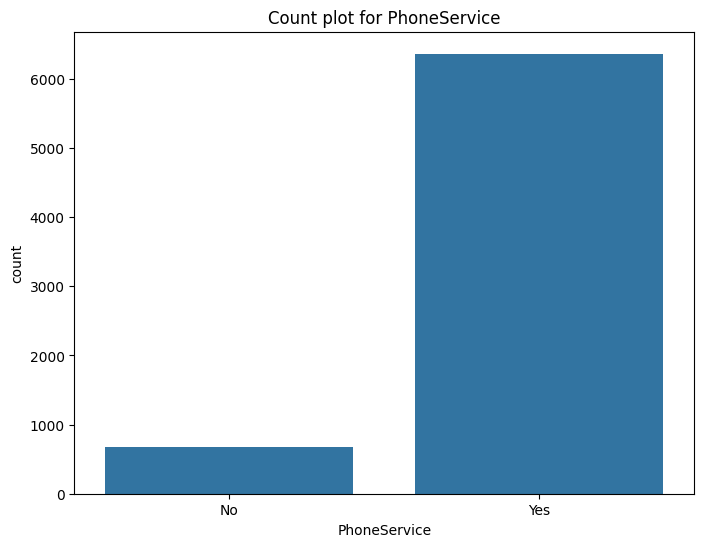

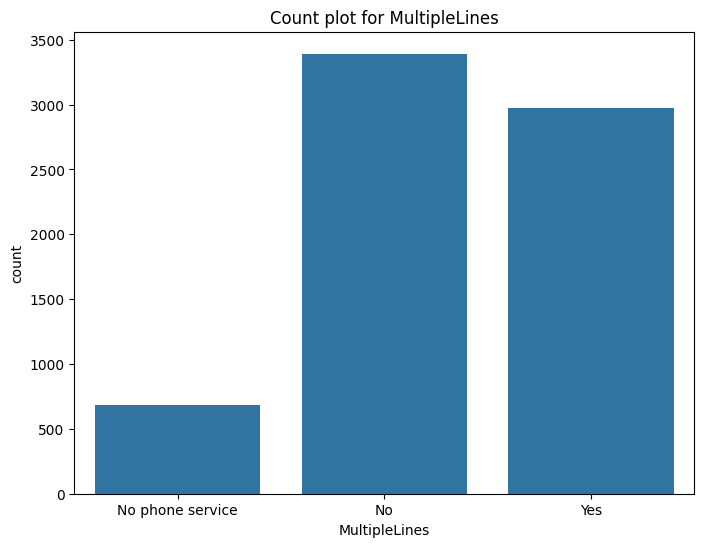

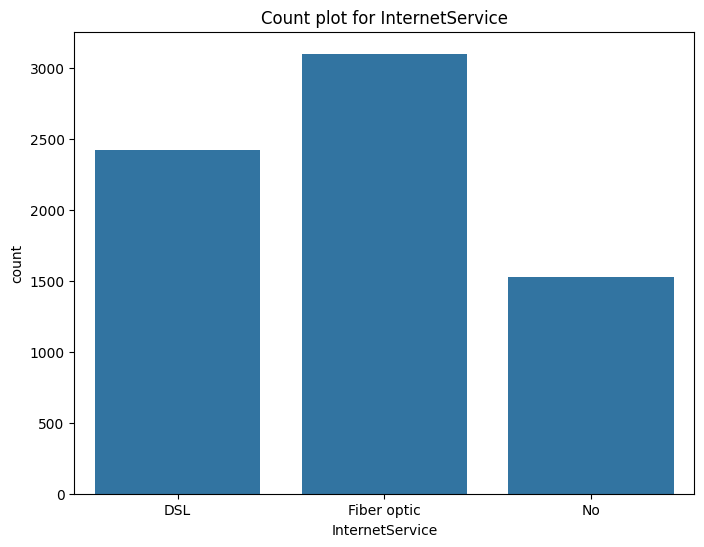

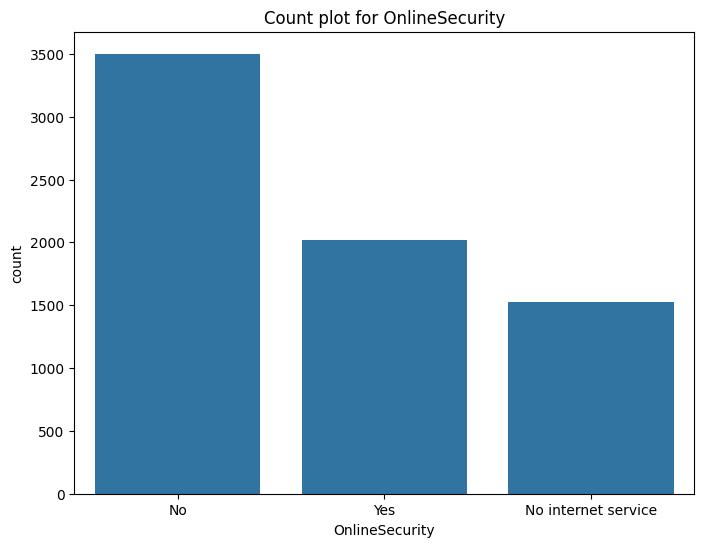

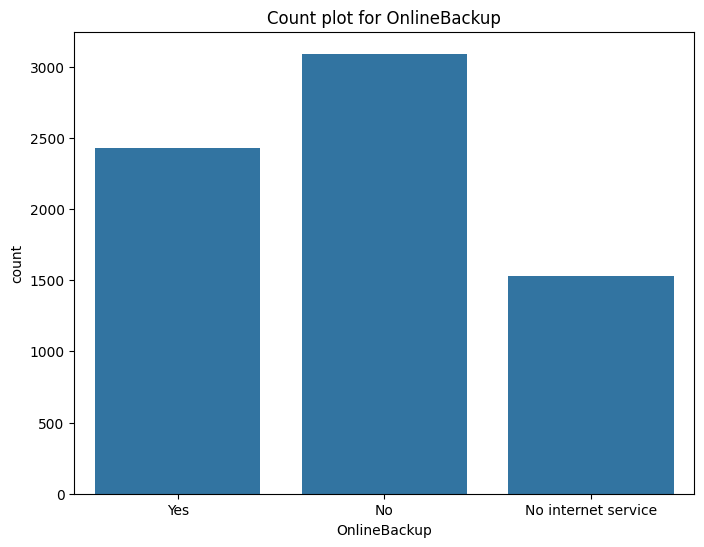

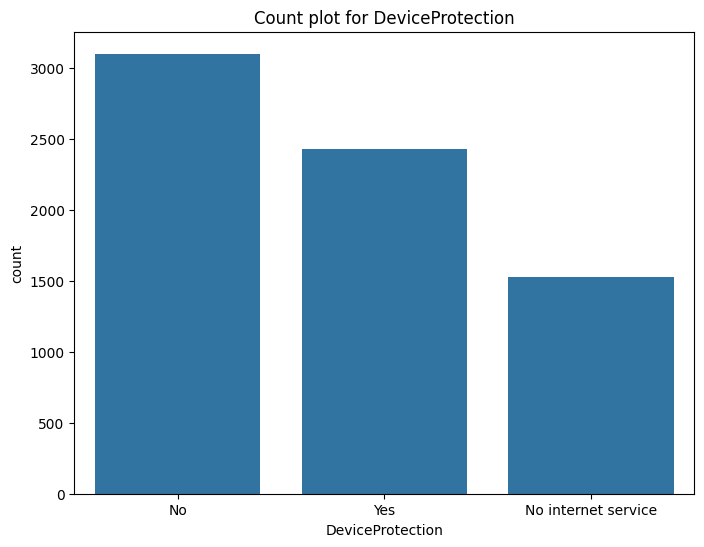

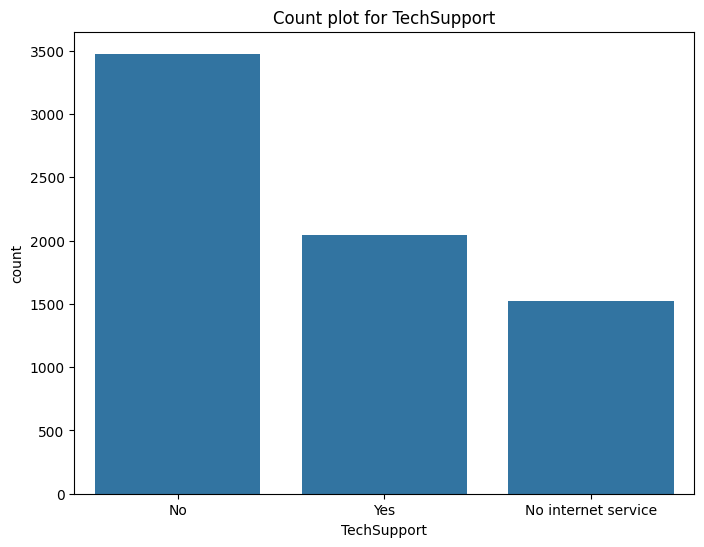

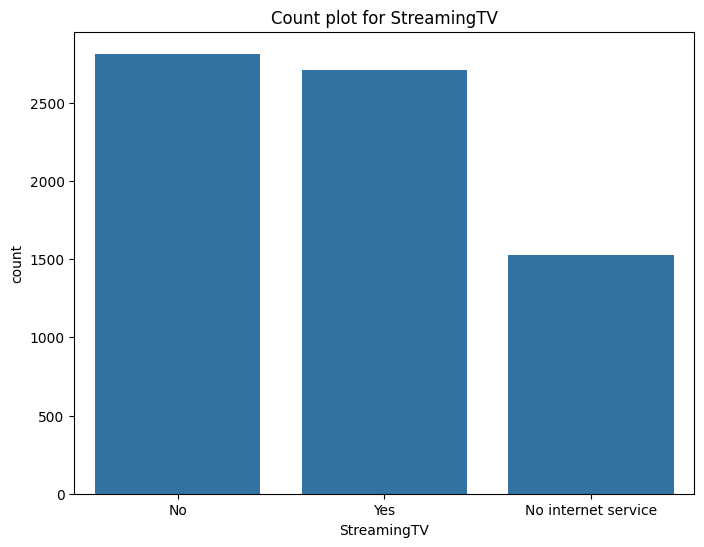

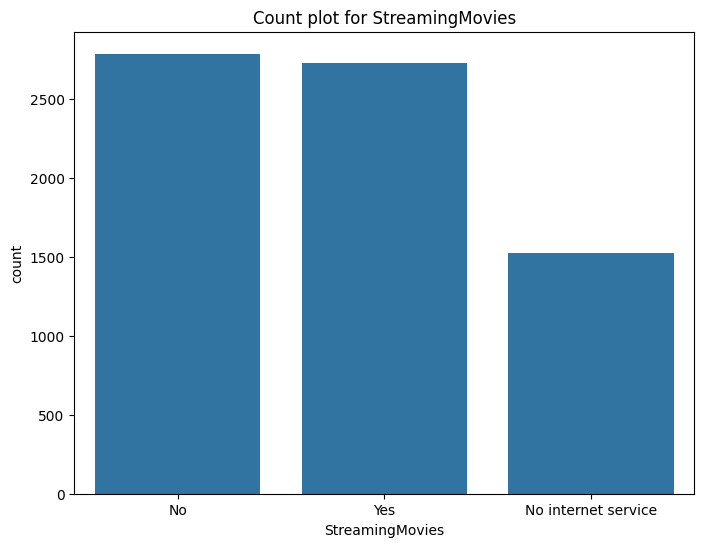

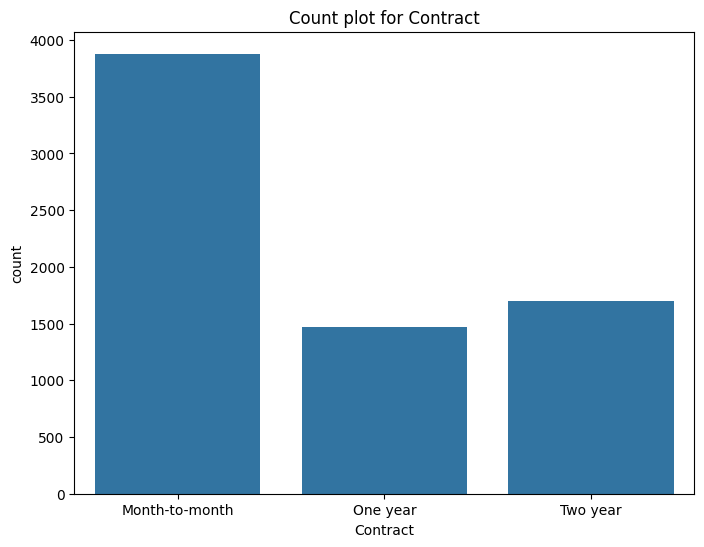

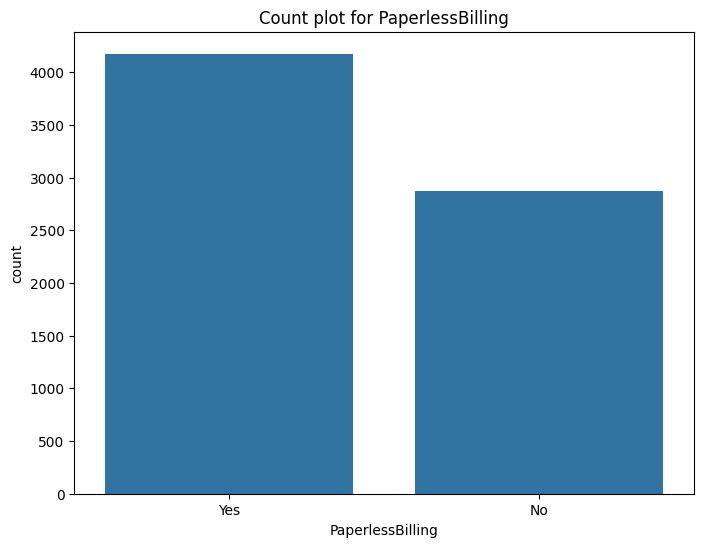

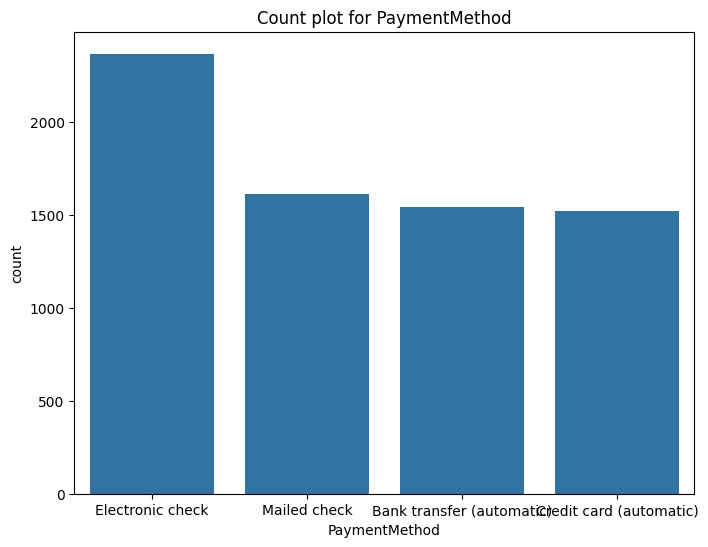

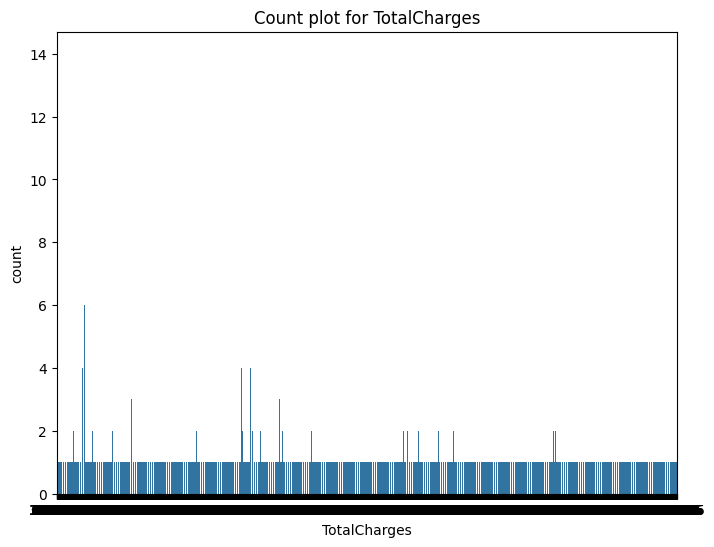

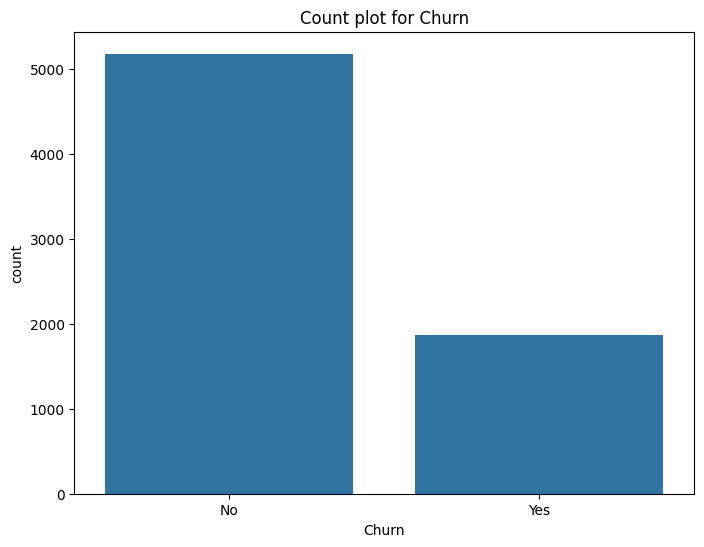

In [96]:
for column in categorical_columns1:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=df[column])
  plt.xlabel(column)
  plt.title(f"Count plot for {column}")
  plt.show()

In [97]:
df[categorical_columns1].nunique().sort_values(ascending = False)

,0
TotalCharges,6528
PaymentMethod,4
DeviceProtection,3
Contract,3
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
TechSupport,3
StreamingTV,3


In [98]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [99]:
columns_to_encode = ['PaymentMethod', 'DeviceProtection', 'Contract', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'PaperlessBilling', 'gender', 'Partner', 'PhoneService', 'Dependents', 'Churn']

df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [101]:
df.replace({True: 1, False: 0}, inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
import pandas as pd

# Assuming df is already loaded
# df = pd.read_csv('your_dataset.csv')

# List of columns to apply One-Hot Encoding
one_hot_columns = [
    'PaymentMethod', 'DeviceProtection', 'Contract', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'gender',
    'Partner', 'PhoneService', 'Dependents', 'Churn'
]

# Apply One-Hot Encoding to the listed columns
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# Now `df` is updated with One-Hot Encoding applied
print(df.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0              0       1           29.85         29.85   
1              0      34           56.95       1889.50   
2              0       2           53.85        108.15   
3              0      45           42.30       1840.75   
4              0       2           70.70        151.65   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  DeviceProtection_No internet service  \
0                       False                                 False   
1                        True                       

In [103]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No internet service,DeviceProtection_Yes,Contract_One year,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,gender_Male,Partner_Yes,PhoneService_Yes,Dependents_Yes,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,0,34,56.95,1889.50,False,False,True,False,True,True,...,False,False,False,False,False,True,False,True,False,False
2,0,2,53.85,108.15,False,False,True,False,False,False,...,False,False,False,False,True,True,False,True,False,True
3,0,45,42.30,1840.75,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
4,0,2,70.70,151.65,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,0,2,53.85,108.15,False,False,True,False,False,False,...,False,False,False,False,True,True,False,True,False,True
7044,0,45,42.30,1840.75,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
7045,0,2,70.70,151.65,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
7046,0,8,99.65,820.50,False,True,False,False,True,False,...,False,True,False,True,True,False,False,True,False,True


In [104]:
df.replace({True: 1, False: 0}, inplace = True)
df.head()

<ipython-input-104-93380eb85ed4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True: 1, False: 0}, inplace = True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No internet service,DeviceProtection_Yes,Contract_One year,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,gender_Male,Partner_Yes,PhoneService_Yes,Dependents_Yes,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,34,56.95,1889.50,0,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0
2,0,2,53.85,108.15,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,1
3,0,45,42.30,1840.75,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,2,70.70,151.65,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7048 non-null   int64  
 1   tenure                                 7048 non-null   int64  
 2   MonthlyCharges                         7048 non-null   float64
 3   TotalCharges                           7034 non-null   float64
 4   PaymentMethod_Credit card (automatic)  7048 non-null   int64  
 5   PaymentMethod_Electronic check         7048 non-null   int64  
 6   PaymentMethod_Mailed check             7048 non-null   int64  
 7   DeviceProtection_No internet service   7048 non-null   int64  
 8   DeviceProtection_Yes                   7048 non-null   int64  
 9   Contract_One year                      7048 non-null   int64  
 10  Contract_Two year                      7048 non-null   int64  
 11  Mult

In [112]:
df['Churn_Yes']

,Churn_Yes
0,0
1,0
2,1
3,0
4,1
...,...
7043,1
7044,0
7045,1
7046,1


In [116]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Column Name': df.columns,
                           'Missing Values': df.isnull().sum(),
                           'Missing Percentage': missing_percentage}).sort_values(by='Missing Percentage', ascending=False)
missing_df

,Column Name,Missing Values,Missing Percentage
TotalCharges,TotalCharges,14,0.198638
SeniorCitizen,SeniorCitizen,0,0.000000
OnlineSecurity_Yes,OnlineSecurity_Yes,0,0.000000
Dependents_Yes,Dependents_Yes,0,0.000000
PhoneService_Yes,PhoneService_Yes,0,0.000000
Partner_Yes,Partner_Yes,0,0.000000
gender_Male,gender_Male,0,0.000000
PaperlessBilling_Yes,PaperlessBilling_Yes,0,0.000000
StreamingMovies_Yes,StreamingMovies_Yes,0,0.000000
StreamingMovies_No internet service,StreamingMovies_No internet service,0,0.000000


In [117]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7043,108.15
7044,1840.75
7045,151.65
7046,820.50


In [118]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [119]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Column Name': df.columns,
                           'Missing Values': df.isnull().sum(),
                           'Missing Percentage': missing_percentage}).sort_values(by='Missing Percentage', ascending=False)
missing_df

,Column Name,Missing Values,Missing Percentage
SeniorCitizen,SeniorCitizen,0,0.0
OnlineSecurity_Yes,OnlineSecurity_Yes,0,0.0
Dependents_Yes,Dependents_Yes,0,0.0
PhoneService_Yes,PhoneService_Yes,0,0.0
Partner_Yes,Partner_Yes,0,0.0
gender_Male,gender_Male,0,0.0
PaperlessBilling_Yes,PaperlessBilling_Yes,0,0.0
StreamingMovies_Yes,StreamingMovies_Yes,0,0.0
StreamingMovies_No internet service,StreamingMovies_No internet service,0,0.0
StreamingTV_Yes,StreamingTV_Yes,0,0.0


In [120]:
x = df.drop('Churn_Yes',axis=1)
y = df['Churn_Yes']

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8063829787234043


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm

array([[931, 102],
       [171, 206]])

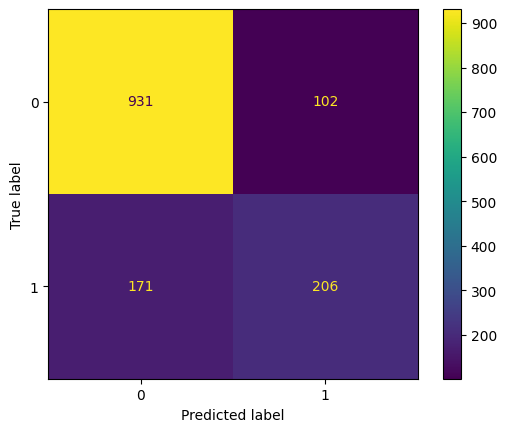

In [125]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [126]:
cm.ravel()


array([931, 102, 171, 206])

In [127]:
from sklearn.metrics import precision_score , recall_score , f1_score, accuracy_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8063829787234043
0.6688311688311688
0.5464190981432361
0.6014598540145986


In [128]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

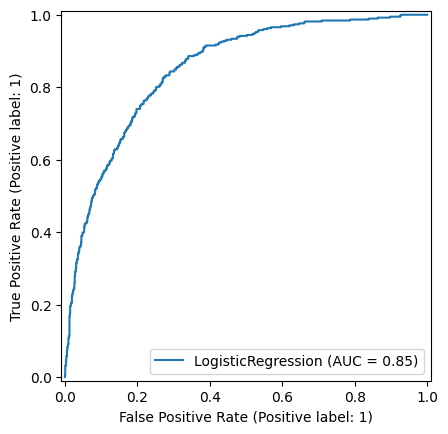

In [129]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()